# Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('trending.csv', encoding = 'utf8', delimiter = ',')

# Data Understanding

## Initial Uderstanding & Transformation

In [3]:
print(data.shape)
data.head()

(54059, 27)


,video_id,publish_time,channel_id,title,description,thumbnail_url,thumbnail_width,thumbnail_height,channel_name,tags,...,caption,license_status,allowed_region,blocked_region,view,like,dislike,favorite,comment,trending_time
0,NaN,2021-02-05T09:00:34Z,UCEf_Bc-KVd7onSeifS3py9g,aespa 에스파 'Forever (약속)' MV,"aespa's new single ""Forever"" is out!\nListen a...",NaN,NaN,NaN,SMTOWN,NaN,...,True,True,NaN,NaN,7806846.0,857902.0,24078.0,0,94961.0,2021-02-07 05:46:51.832614+00:00
1,NaN,2021-02-04T15:54:08Z,UCYEa4_MC7OFjcWrO6SO-u8g,[FULL] Siapa di Balik Kudeta AHY? | Dua Sisi t...,"Jakarta, https://www.tvonenews.com - Ketua umu...",NaN,NaN,NaN,Indonesia Lawyers Club,"['tvone', 'tv one', 'tvonenews', 'indonesia la...",...,False,True,NaN,NaN,885038.0,6765.0,1263.0,0,6365.0,2021-02-07 05:46:51.832649+00:00
2,NaN,2021-02-06T03:00:22Z,UCu12RxQjRQyh79YBYvEDkOg,CABRIOLET CHALLENGE: TANTANGAN MENGGODA (7/12),Road Party Season 2: Cabriolet Challenge\n\nEp...,NaN,NaN,NaN,Motomobi,"['MotoMobi', 'Mobil', 'motor', 'review', 'indo...",...,False,True,NaN,NaN,889708.0,47895.0,532.0,0,8785.0,2021-02-07 05:46:51.832664+00:00
3,NaN,2021-02-05T20:26:08Z,UCCuzDCoI3EUOo_nhCj4noSw,With Windah Basudara & Hans,Join this channel to get access to perks:\nhtt...,NaN,NaN,NaN,yb,NaN,...,False,True,NaN,NaN,1006854.0,91973.0,3967.0,0,12957.0,2021-02-07 05:46:51.832678+00:00
4,NaN,2021-02-03T23:14:54Z,UC14UlmYlSNiQCBe9Eookf_A,🤯 LATE COMEBACK DRAMA! | HIGHLIGHTS | Granada ...,"With just two minutes to play, Barça looked to...",NaN,NaN,NaN,FC Barcelona,"['FC Barcelona', 'برشلونة،', 'Fútbol', 'FUTBOL...",...,False,True,NaN,NaN,6275035.0,218131.0,4289.0,0,12799.0,2021-02-07 05:46:51.832730+00:00


In [4]:
data.dtypes

video_id              object
publish_time          object
channel_id            object
title                 object
description           object
thumbnail_url         object
thumbnail_width      float64
thumbnail_height     float64
channel_name          object
tags                  object
category_id            int64
live_status           object
local_title           object
local_description     object
duration              object
dimension             object
definition            object
caption                 bool
license_status          bool
allowed_region        object
blocked_region        object
view                 float64
like                 float64
dislike              float64
favorite               int64
comment              float64
trending_time         object
dtype: object

In [5]:
data.describe()

,thumbnail_width,thumbnail_height,category_id,view,like,dislike,favorite,comment
count,937.0,937.0,54059.000000,5.405100e+04,5.343000e+04,53430.000000,54059.0,5.380400e+04
mean,480.0,360.0,18.551287,3.675736e+06,1.812868e+05,4557.326932,0.0,1.813808e+04
std,0.0,0.0,7.094194,1.246979e+07,6.940099e+05,17018.392696,0.0,1.707775e+05
min,480.0,360.0,1.000000,1.528200e+04,1.600000e+01,0.000000,0.0,0.000000e+00
25%,480.0,360.0,10.000000,3.430485e+05,7.923500e+03,190.000000,0.0,5.790000e+02
50%,480.0,360.0,22.000000,9.263850e+05,2.478350e+04,577.000000,0.0,1.910500e+03
75%,480.0,360.0,24.000000,2.421131e+06,9.053700e+04,2001.000000,0.0,6.230000e+03
max,480.0,360.0,29.000000,3.359576e+08,1.700526e+07,433282.000000,0.0,7.195733e+06


In [6]:
data['publish_time'] = pd.to_datetime(data['publish_time'])
data['trending_time'] = pd.to_datetime(data['trending_time'])

data['publish_day'] = data['publish_time'].dt.day_name()
data['publish_day_no'] = data['publish_time'].dt.dayofweek
data['publish_hour'] = data['publish_time'].dt.hour
data['trend_date'] = data['trending_time'].dt.date

data['jarak_trending'] = (data['trending_time'] - data['publish_time']).dt.days

data['description_length'] = data['description'].str.split().str.len()
data['description_length'] = data['description_length'].fillna('0')

data['title_length'] = data['title'].str.split().str.len()

data['no_of_tags'] = data['tags'].str.count("\w+.+?(?=')")
data['no_of_tags'] = data['no_of_tags'].fillna('0')

def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False

data["contains_capitalized"] = data["title"].apply(contains_capitalized_word)

import isodate
durasi = []
for i in data['duration']:
    dur = isodate.parse_duration(i)
    durasi.append(dur.total_seconds())
durasi = pd.DataFrame(durasi)
data['duration'] = durasi

print('sizenya  : ', data.shape)
print('kolomnya : ',data.columns)

sizenya  :  (54059, 36)
kolomnya :  Index(['video_id', 'publish_time', 'channel_id', 'title', 'description',
       'thumbnail_url', 'thumbnail_width', 'thumbnail_height', 'channel_name',
       'tags', 'category_id', 'live_status', 'local_title',
       'local_description', 'duration', 'dimension', 'definition', 'caption',
       'license_status', 'allowed_region', 'blocked_region', 'view', 'like',
       'dislike', 'favorite', 'comment', 'trending_time', 'publish_day',
       'publish_day_no', 'publish_hour', 'trend_date', 'jarak_trending',
       'description_length', 'title_length', 'no_of_tags',
       'contains_capitalized'],
      dtype='object')


In [7]:
data['category_name'] = np.nan
data.loc[(data["category_id"] == 1),"category_name"] = 'Film and Animation'
data.loc[(data["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
data.loc[(data["category_id"] == 10),"category_name"] = 'Music'
data.loc[(data["category_id"] == 15),"category_name"] = 'Pets and Animals'
data.loc[(data["category_id"] == 17),"category_name"] = 'Sport'
data.loc[(data["category_id"] == 19),"category_name"] = 'Travel and Events'
data.loc[(data["category_id"] == 20),"category_name"] = 'Gaming'
data.loc[(data["category_id"] == 22),"category_name"] = 'People and Blogs'
data.loc[(data["category_id"] == 23),"category_name"] = 'Comedy'
data.loc[(data["category_id"] == 24),"category_name"] = 'Entertainment'
data.loc[(data["category_id"] == 25),"category_name"] = 'News and Politics'
data.loc[(data["category_id"] == 26),"category_name"] = 'How to and Style'
data.loc[(data["category_id"] == 27),"category_name"] = 'Education'
data.loc[(data["category_id"] == 28),"category_name"] = 'Science and Technology'
data.loc[(data["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
data.loc[(data["category_id"] == 43),"category_name"] = 'Shows'

## Exploration

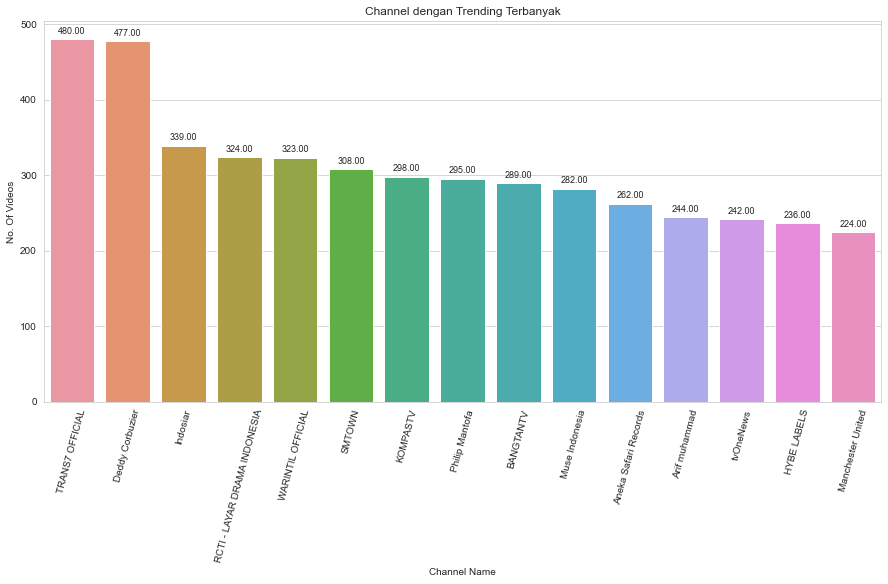

In [8]:
channel_terbanyak = data.groupby(by = 'channel_name').count().sort_values(by = 'trending_time', ascending = False).head(15)

sns.set_style('whitegrid')

fig=plt.figure(figsize=(15,7))
plots = sns.barplot(x=channel_terbanyak.index, y=channel_terbanyak['trending_time'])
plt.xlabel("Channel Name")
plt.title('Channel dengan Trending Terbanyak')
plt.ylabel("No. Of Videos")
plt.xticks(rotation=75)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 8),
                   textcoords='offset points')
    
plt.show()

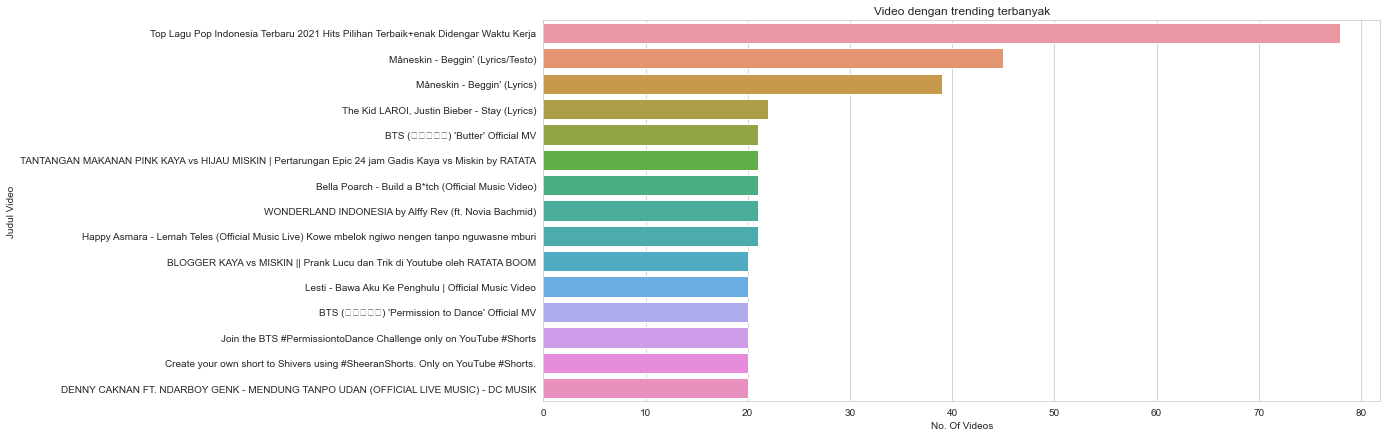

In [9]:
judul_terbanyak = data.groupby('title').count().sort_values(by = 'trending_time', ascending = False).head(15)

fig=plt.figure(figsize=(15,7))
plots = sns.barplot(y=judul_terbanyak.index, x=judul_terbanyak['trending_time'])
plt.title('Video dengan trending terbanyak')
plt.ylabel("Judul Video")
plt.xlabel("No. Of Videos")
    
plt.show()

<AxesSubplot:title={'center':'Hari Video Trending Diunggah'}, xlabel='Publishing Day', ylabel='No. Of Videos'>

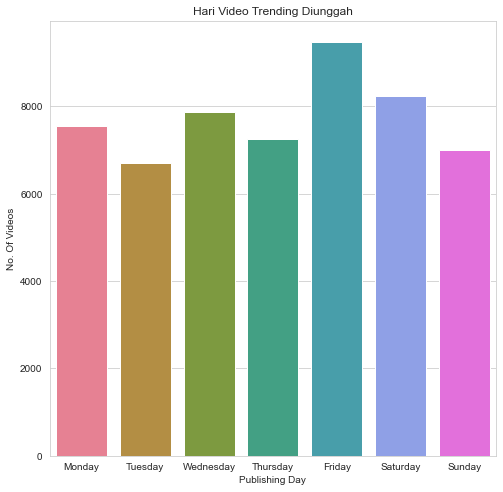

In [10]:
plt.figure(figsize=(8,8))

my_dict=(data['publish_day'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['Publishing Day','No. Of Videos'])

plt.title('Hari Video Trending Diunggah')

sns.barplot(count['Publishing Day'],count['No. Of Videos'],order = ['Monday', 'Tuesday', 'Wednesday','Thursday',
                           'Friday','Saturday','Sunday'], palette = 'husl')


<AxesSubplot:title={'center':'Waktu Video Trending Diunggah'}, xlabel='Publishing Hour', ylabel='No. Of Videos'>

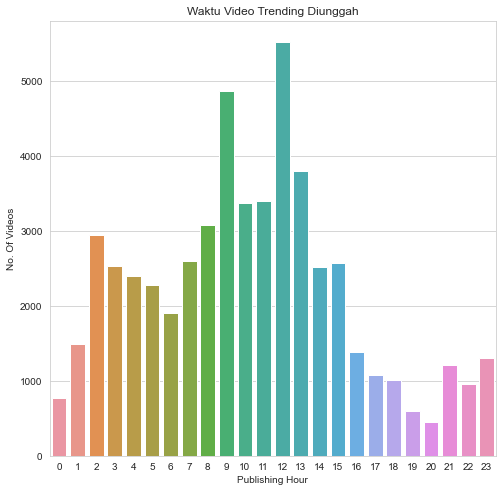

In [11]:
plt.figure(figsize=(8,8))

my_dict=(data['publish_hour'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['Publishing Hour','No. Of Videos']) 

plt.title('Waktu Video Trending Diunggah')
sns.barplot(count['Publishing Hour'],count['No. Of Videos'])


Text(0.5, 1.0, 'Jumlah video trending untuk setiap kategori')

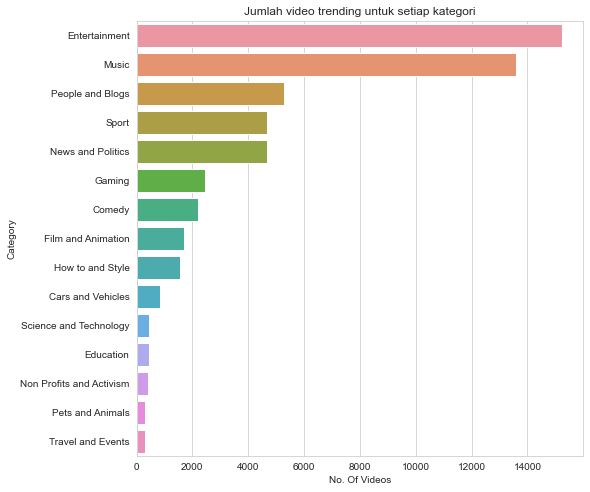

In [12]:
plt.figure(figsize=(8,8))
my_dict=(data['category_name'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['Category','No. Of Videos']) 
sns.barplot(y=count['Category'],x=count['No. Of Videos'])
plt.title('Jumlah video trending untuk setiap kategori')


In [13]:
jumlah_video = data.groupby('channel_name')['title'].nunique()
yoyo = pd.merge(channel_terbanyak, jumlah_video, on='channel_name')
yoyo = yoyo[['trending_time', 'title_y']]
yoyo.head(25)

,trending_time,title_y
channel_name,,
TRANS7 OFFICIAL,480,168
Deddy Corbuzier,477,108
Indosiar,339,89
RCTI - LAYAR DRAMA INDONESIA,324,174
WARINTIL OFFICIAL,323,105
SMTOWN,308,31
KOMPASTV,298,87
Philip Mantofa,295,80
BANGTANTV,289,52


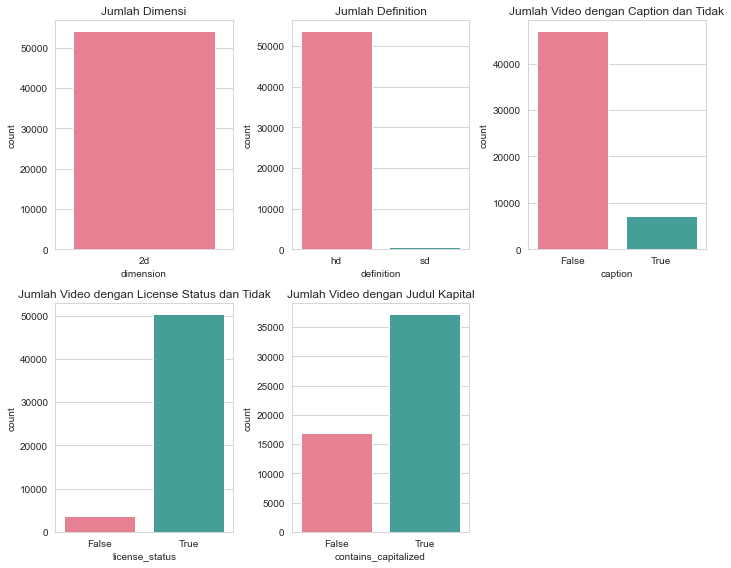

In [14]:
plt.figure(figsize=(10,8))

plt.subplot(2,3,1)
sns.countplot(data['dimension'],palette = 'husl')
plt.title('Jumlah Dimensi')

plt.subplot(2,3,2)
sns.countplot(data['definition'],palette = 'husl')
plt.title('Jumlah Definition')

plt.subplot(2,3,3)
sns.countplot(data['caption'],palette = 'husl')
plt.title('Jumlah Video dengan Caption dan Tidak')

plt.subplot(2,3,4)
sns.countplot(data['license_status'],palette = 'husl')
plt.title('Jumlah Video dengan License Status dan Tidak')

plt.subplot(2,3,5)
sns.countplot(data['contains_capitalized'],palette = 'husl')
plt.title('Jumlah Video dengan Judul Kapital')

plt.tight_layout()

<AxesSubplot:xlabel='trend_date', ylabel='like'>

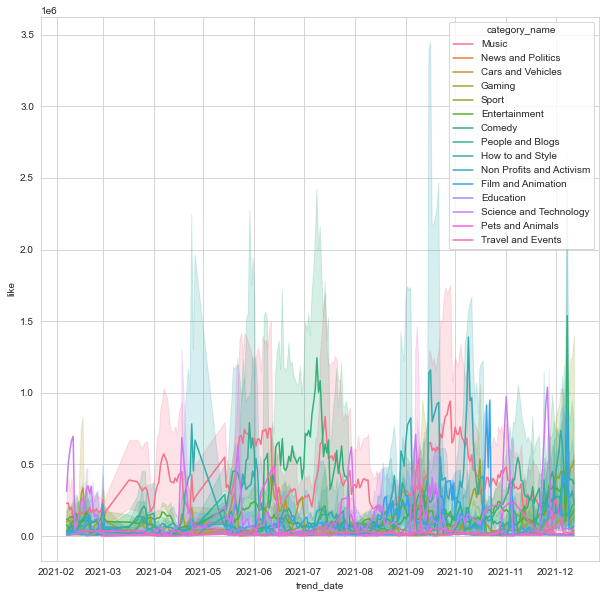

In [15]:
daily_like= data.groupby(by = ['category_name', 'trend_date'])
daily_like .head()

plt.figure(figsize=(10,10))
sns.lineplot(x=data['trend_date'], 
             y = data['like'], hue = data['category_name'])

In [16]:
data['description_length'] = data['description_length'].astype('int')
data['no_of_tags'] = data['no_of_tags'].astype('int')
data.dtypes

video_id                             object
publish_time            datetime64[ns, UTC]
channel_id                           object
title                                object
description                          object
thumbnail_url                        object
thumbnail_width                     float64
thumbnail_height                    float64
channel_name                         object
tags                                 object
category_id                           int64
live_status                          object
local_title                          object
local_description                    object
duration                            float64
dimension                            object
definition                           object
caption                                bool
license_status                         bool
allowed_region                       object
blocked_region                       object
view                                float64
like                            

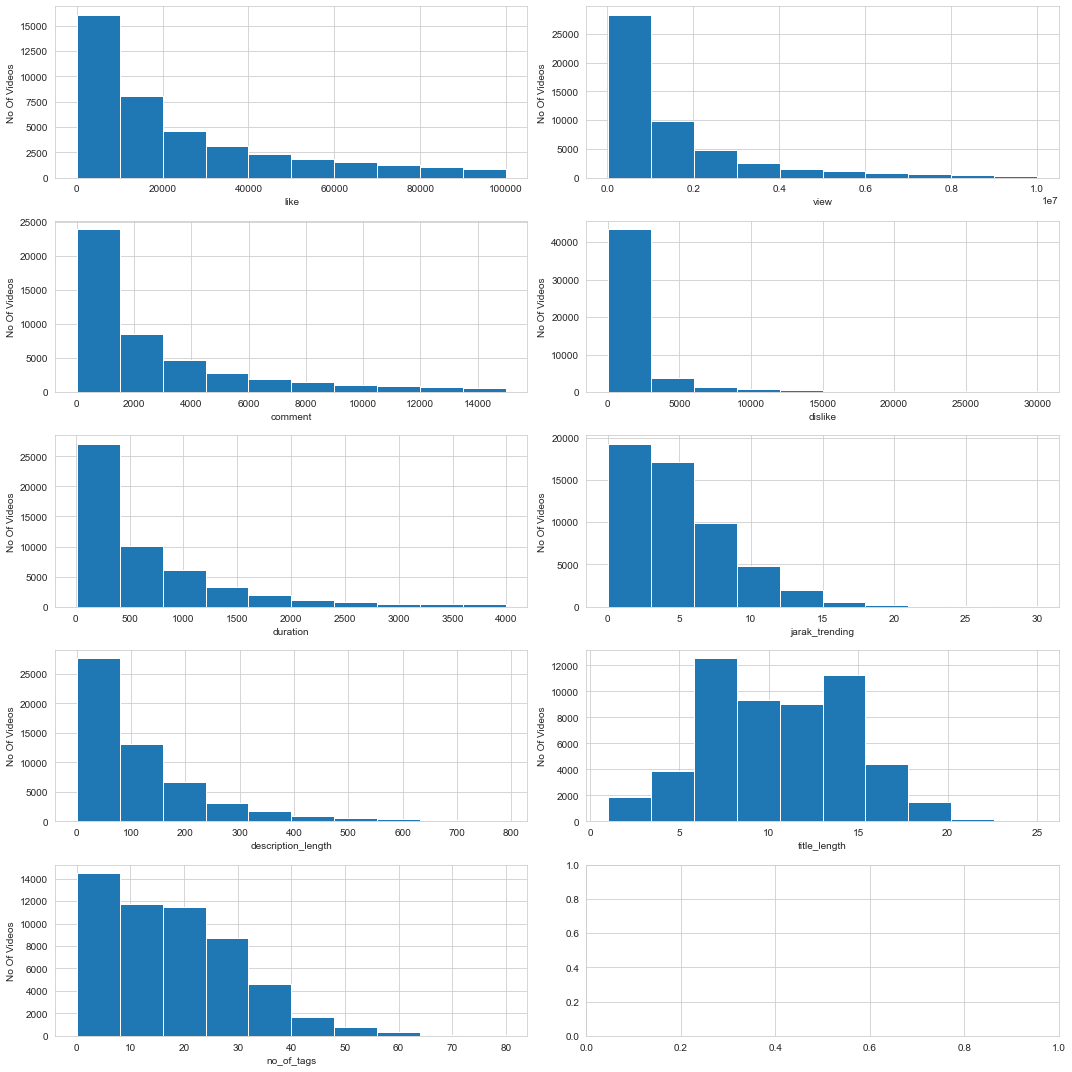

In [17]:
r=[100000,10000000,15000,30000,4000,30,800,25,80]
numerical = ['like','view','comment','dislike','duration', 'jarak_trending',
             'description_length','title_length','no_of_tags']
fig, ax = plt.subplots(5, 2, figsize=(15, 15))
for var,i,subplot in zip(numerical, r, ax.flatten()):
    ax=data[data[var]<=i][var].hist(ax=subplot,ylabelsize=10,xlabelsize=10)
    ax.set_xlabel(var,fontsize=10)
    ax.set_ylabel("No Of Videos",fontsize=10)
fig.tight_layout()    

<Figure size 1080x1080 with 0 Axes>

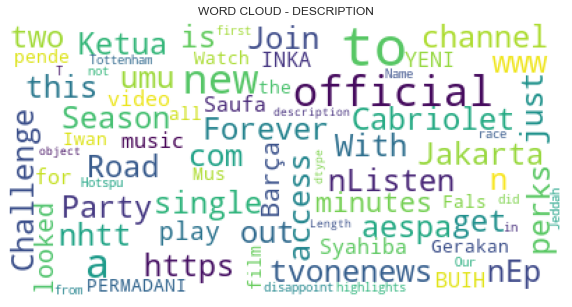

In [18]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

plt.figure(figsize = (15,15))

stopwords = stopwords.words('indonesian')
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=5000,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(data['description']))

print(wordcloud)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION")
plt.axis('off')
plt.show()

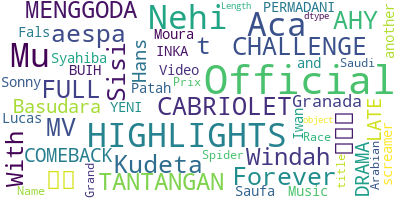

<Figure size 1080x1080 with 0 Axes>

In [19]:
import nltk
from nltk.corpus import stopwords

plt.figure(figsize = (15,15))

stopwords = stopwords.words('indonesian')
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=5000,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(data['title']))

# Generate a word cloud
wordcloud.generate(str(data['title']))
# Visualize the word cloud
wordcloud.to_image()

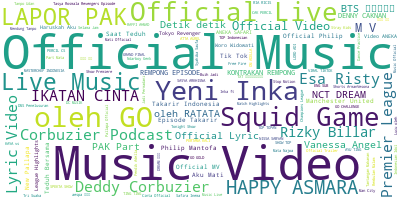

In [20]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(data['title'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

<AxesSubplot:>

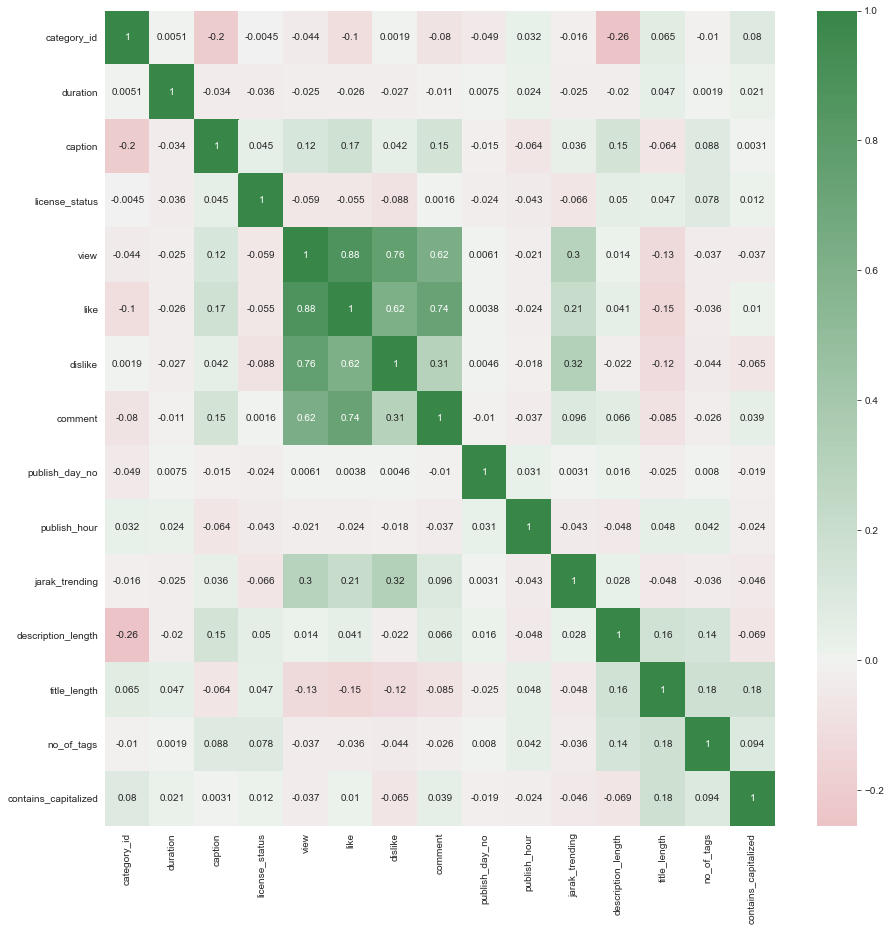

In [21]:
plt.figure(figsize = (15,15))

col = data.drop(['favorite','thumbnail_width','thumbnail_height'], axis =1)

cmap = sns.diverging_palette(10, 133, as_cmap=True)
sns.heatmap(data=col.corr(), annot = True, cmap = cmap, center=0.00)

# Data Preparation

In [22]:
print(data.duplicated().sum())

0


In [23]:
data.isna().sum()

video_id                53122
publish_time                0
channel_id                  0
title                       0
description              1902
thumbnail_url           53122
thumbnail_width         53122
thumbnail_height        53122
channel_name                0
tags                     6659
category_id                 0
live_status                 0
local_title                 0
local_description        1902
duration                    0
dimension                   0
definition                  0
caption                     0
license_status              0
allowed_region          52248
blocked_region          51942
view                        8
like                      629
dislike                   629
favorite                    0
comment                   255
trending_time               0
publish_day                 0
publish_day_no              0
publish_hour                0
trend_date                  0
jarak_trending              0
description_length          0
title_leng

In [24]:
data['live_status'].unique()

array(['none'], dtype=object)

Text(0, 0.5, 'Percentage Missing')

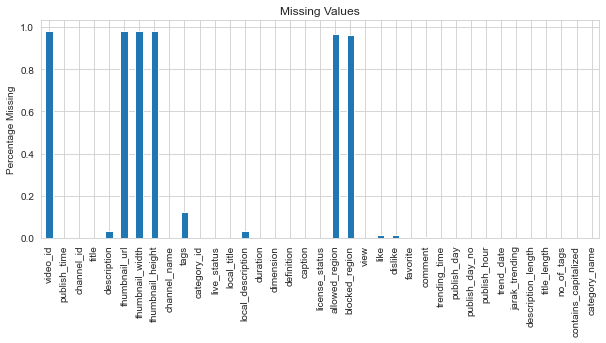

In [25]:
# Missing Values
plt.figure(figsize=(10,4))

(data.isna().sum()/data.shape[0]).plot(kind='bar')
plt.title('Missing Values')
plt.ylabel('Percentage Missing')

In [26]:
datafix = data
print(datafix.dtypes)
datafix.describe()

video_id                             object
publish_time            datetime64[ns, UTC]
channel_id                           object
title                                object
description                          object
thumbnail_url                        object
thumbnail_width                     float64
thumbnail_height                    float64
channel_name                         object
tags                                 object
category_id                           int64
live_status                          object
local_title                          object
local_description                    object
duration                            float64
dimension                            object
definition                           object
caption                                bool
license_status                         bool
allowed_region                       object
blocked_region                       object
view                                float64
like                            

,thumbnail_width,thumbnail_height,category_id,duration,view,like,dislike,favorite,comment,publish_day_no,publish_hour,jarak_trending,description_length,title_length,no_of_tags
count,937.0,937.0,54059.000000,5.405900e+04,5.405100e+04,5.343000e+04,53430.000000,54059.0,5.380400e+04,54059.000000,54059.000000,54059.00000,54059.000000,54059.000000,54059.000000
mean,480.0,360.0,18.551287,1.368979e+03,3.675736e+06,1.812868e+05,4557.326932,0.0,1.813808e+04,3.055735,10.181672,4.56788,115.720343,10.462587,17.312917
std,0.0,0.0,7.094194,9.130273e+03,1.246979e+07,6.940099e+05,17018.392696,0.0,1.707775e+05,1.959980,5.531693,3.79472,116.310057,3.959106,13.109137
min,480.0,360.0,1.000000,1.000000e+01,1.528200e+04,1.600000e+01,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000
25%,480.0,360.0,10.000000,2.090000e+02,3.430485e+05,7.923500e+03,190.000000,0.0,5.790000e+02,1.000000,6.000000,2.00000,39.000000,8.000000,7.000000
50%,480.0,360.0,22.000000,4.060000e+02,9.263850e+05,2.478350e+04,577.000000,0.0,1.910500e+03,3.000000,10.000000,4.00000,76.000000,10.000000,16.000000
75%,480.0,360.0,24.000000,9.820000e+02,2.421131e+06,9.053700e+04,2001.000000,0.0,6.230000e+03,5.000000,13.000000,7.00000,156.000000,14.000000,26.000000
max,480.0,360.0,29.000000,1.333682e+06,3.359576e+08,1.700526e+07,433282.000000,0.0,7.195733e+06,6.000000,23.000000,34.00000,918.000000,25.000000,103.000000


In [27]:
datafix = datafix.drop(columns=['video_id', 'publish_time','channel_id', 'thumbnail_width', 'thumbnail_height', 'title',
                                'favorite', 'thumbnail_url','video_id', 'tags', 'description', 'channel_name',
                                'live_status','local_title','allowed_region','blocked_region', 'trend_date', 'dimension',
                                'local_description', 'trending_time', 'publish_day', 'category_id',
                               'dislike','comment','definition'], axis =1)

datafix.head()

,duration,caption,license_status,view,like,publish_day_no,publish_hour,jarak_trending,description_length,title_length,no_of_tags,contains_capitalized,category_name
0,307.0,True,True,7806846.0,857902.0,4,9,1,43,5,0,True,Music
1,2550.0,False,True,885038.0,6765.0,3,15,2,96,10,20,True,News and Politics
2,2803.0,False,True,889708.0,47895.0,5,3,1,335,5,32,True,Cars and Vehicles
3,2759.0,False,True,1006854.0,91973.0,4,20,1,14,5,0,False,Gaming
4,312.0,False,True,6275035.0,218131.0,2,23,3,108,10,50,True,Sport


In [28]:
datafix.isna().sum()

duration                  0
caption                   0
license_status            0
view                      8
like                    629
publish_day_no            0
publish_hour              0
jarak_trending            0
description_length        0
title_length              0
no_of_tags                0
contains_capitalized      0
category_name             0
dtype: int64

In [29]:
datafix = datafix.dropna()
print(datafix.shape)
datafix.head()

(53430, 13)


,duration,caption,license_status,view,like,publish_day_no,publish_hour,jarak_trending,description_length,title_length,no_of_tags,contains_capitalized,category_name
0,307.0,True,True,7806846.0,857902.0,4,9,1,43,5,0,True,Music
1,2550.0,False,True,885038.0,6765.0,3,15,2,96,10,20,True,News and Politics
2,2803.0,False,True,889708.0,47895.0,5,3,1,335,5,32,True,Cars and Vehicles
3,2759.0,False,True,1006854.0,91973.0,4,20,1,14,5,0,False,Gaming
4,312.0,False,True,6275035.0,218131.0,2,23,3,108,10,50,True,Sport


In [30]:
datafix['description_length'] = datafix['description_length'].astype('int')
datafix['no_of_tags'] = datafix['no_of_tags'].astype('int')
datafix.dtypes

duration                float64
caption                    bool
license_status             bool
view                    float64
like                    float64
publish_day_no            int64
publish_hour              int64
jarak_trending            int64
description_length        int32
title_length              int64
no_of_tags                int32
contains_capitalized       bool
category_name            object
dtype: object

## Splitting Data

In [31]:
#Encoding Data

datamodel = datafix
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in datamodel.columns:
    if i in ['caption','license_status','contains_capitalized']:
        datamodel[i] = le.fit_transform(datamodel[i])
datamodel

,duration,caption,license_status,view,like,publish_day_no,publish_hour,jarak_trending,description_length,title_length,no_of_tags,contains_capitalized,category_name
0,307.0,1,1,7806846.0,857902.0,4,9,1,43,5,0,1,Music
1,2550.0,0,1,885038.0,6765.0,3,15,2,96,10,20,1,News and Politics
2,2803.0,0,1,889708.0,47895.0,5,3,1,335,5,32,1,Cars and Vehicles
3,2759.0,0,1,1006854.0,91973.0,4,20,1,14,5,0,0,Gaming
4,312.0,0,1,6275035.0,218131.0,2,23,3,108,10,50,1,Sport
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54054,297.0,1,1,320872.0,7886.0,6,2,7,165,10,19,0,Music
54055,320.0,0,1,494469.0,3272.0,3,8,9,462,11,40,1,People and Blogs
54056,459.0,1,1,391080.0,13054.0,0,5,6,669,7,14,0,Music
54057,136.0,0,1,1034816.0,18856.0,6,22,6,78,14,25,1,Sport


In [32]:
datamodel = pd.get_dummies(datamodel, drop_first=True)
print(datamodel.keys())
print(datamodel.shape)

Index(['duration', 'caption', 'license_status', 'view', 'like',
       'publish_day_no', 'publish_hour', 'jarak_trending',
       'description_length', 'title_length', 'no_of_tags',
       'contains_capitalized', 'category_name_Comedy',
       'category_name_Education', 'category_name_Entertainment',
       'category_name_Film and Animation', 'category_name_Gaming',
       'category_name_How to and Style', 'category_name_Music',
       'category_name_News and Politics',
       'category_name_Non Profits and Activism',
       'category_name_People and Blogs', 'category_name_Pets and Animals',
       'category_name_Science and Technology', 'category_name_Sport',
       'category_name_Travel and Events'],
      dtype='object')
(53430, 26)


In [33]:
datamodel.dtypes

duration                                  float64
caption                                     int64
license_status                              int64
view                                      float64
like                                      float64
publish_day_no                              int64
publish_hour                                int64
jarak_trending                              int64
description_length                          int32
title_length                                int64
no_of_tags                                  int32
contains_capitalized                        int64
category_name_Comedy                        uint8
category_name_Education                     uint8
category_name_Entertainment                 uint8
category_name_Film and Animation            uint8
category_name_Gaming                        uint8
category_name_How to and Style              uint8
category_name_Music                         uint8
category_name_News and Politics             uint8


In [34]:
#Normalisasi

from sklearn.preprocessing import MinMaxScaler

scaled_cols = ['duration', 'view', 'like', 
               'publish_day_no', 'publish_hour','description_length',
              'title_length', 'no_of_tags','jarak_trending'] # beritahu kolom yang ingin discale

scaler = MinMaxScaler() # panggil scalernya

scaler.fit(datamodel[scaled_cols]) # fit scaler ke data untuk membuat scaler mengetahui struktur dari data

datamodel[scaled_cols] = scaler.transform(datamodel[scaled_cols]) # transform data dan masukan hasil yang sudah diubah ke dalam data
datamodel.head()

,duration,caption,license_status,view,like,publish_day_no,publish_hour,jarak_trending,description_length,title_length,...,category_name_Gaming,category_name_How to and Style,category_name_Music,category_name_News and Politics,category_name_Non Profits and Activism,category_name_People and Blogs,category_name_Pets and Animals,category_name_Science and Technology,category_name_Sport,category_name_Travel and Events
0,0.000223,1,1,0.023193,0.050448,0.666667,0.391304,0.029412,0.046841,0.166667,...,0,0,1,0,0,0,0,0,0,0
1,0.001905,0,1,0.002589,0.000397,0.500000,0.652174,0.058824,0.104575,0.375000,...,0,0,0,1,0,0,0,0,0,0
2,0.002094,0,1,0.002603,0.002816,0.833333,0.130435,0.029412,0.364924,0.166667,...,0,0,0,0,0,0,0,0,0,0
3,0.002061,0,1,0.002952,0.005408,0.666667,0.869565,0.029412,0.015251,0.166667,...,1,0,0,0,0,0,0,0,0,0
4,0.000226,0,1,0.018633,0.012826,0.333333,1.000000,0.088235,0.117647,0.375000,...,0,0,0,0,0,0,0,0,1,0


In [35]:
datamodel.describe()

,duration,caption,license_status,view,like,publish_day_no,publish_hour,jarak_trending,description_length,title_length,...,category_name_Gaming,category_name_How to and Style,category_name_Music,category_name_News and Politics,category_name_Non Profits and Activism,category_name_People and Blogs,category_name_Pets and Animals,category_name_Science and Technology,category_name_Sport,category_name_Travel and Events
count,53430.000000,53430.000000,53430.000000,53430.000000,53430.000000,53430.000000,53430.000000,53430.000000,53430.000000,53430.000000,...,53430.000000,53430.000000,53430.000000,53430.000000,53430.000000,53430.000000,53430.000000,53430.000000,53430.000000,53430.000000
mean,0.001020,0.129964,0.934494,0.010929,0.010660,0.509879,0.442447,0.134632,0.126461,0.393408,...,0.045761,0.028785,0.251750,0.086974,0.007355,0.098390,0.005877,0.008478,0.086225,0.004978
std,0.006874,0.336267,0.247419,0.037243,0.040812,0.326608,0.240285,0.111774,0.127056,0.164707,...,0.208968,0.167204,0.434022,0.281799,0.085449,0.297845,0.076436,0.091688,0.280699,0.070383
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000149,0.000000,1.000000,0.000976,0.000465,0.166667,0.260870,0.058824,0.042484,0.291667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000298,0.000000,1.000000,0.002715,0.001456,0.500000,0.434783,0.117647,0.082789,0.375000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000730,0.000000,1.000000,0.007186,0.005323,0.833333,0.565217,0.205882,0.171024,0.500000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
X = datamodel.drop('view', axis = 1)
y = datamodel['view']

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)
print("X_train  : ",X_train.shape)
print("X_test   : ",X_test.shape)
print("y_train  : ",y_train.shape)
print("y_test   : ",y_test.shape)

X_train  :  (42744, 25)
X_test   :  (10686, 25)
y_train  :  (42744,)
y_test   :  (10686,)


# Modelling

RIDGE REGRESSION

                                  variabel  koefisien
0                                 duration  -0.000970
1                                  caption  -0.000017
2                           license_status  -0.000711
3                                     like   0.786304
4                           publish_day_no  -0.000423
5                             publish_hour  -0.001997
6                           jarak_trending   0.039049
7                       description_length  -0.002157
8                             title_length   0.002910
9                               no_of_tags   0.001199
10                    contains_capitalized  -0.003857
11                    category_name_Comedy   0.009131
12                 category_name_Education  -0.001972
13             category_name_Entertainment  -0.000026
14        category_name_Film and Animation   0.000533
15                    category_name_Gaming   0.000261
16          category_name_How to and Style   0.005839
17                     categ

<AxesSubplot:xlabel='koefisien', ylabel='variabel'>

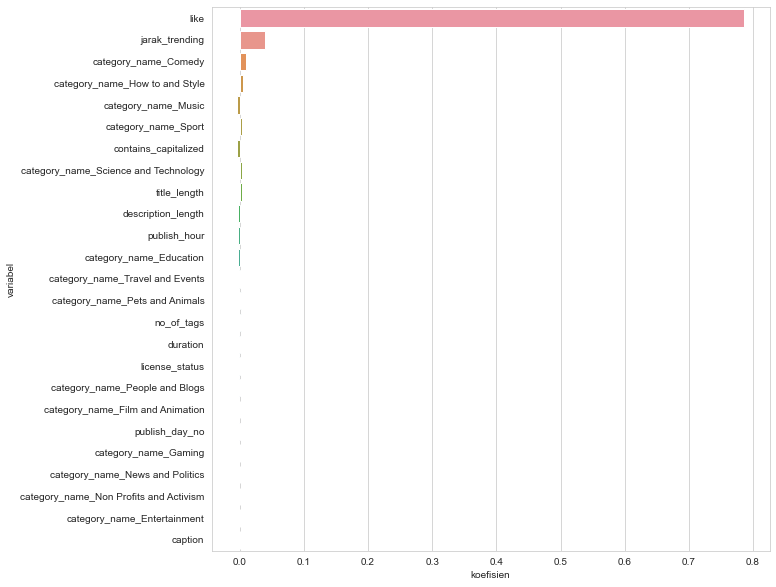

In [38]:
#Ridge Regression

from sklearn.linear_model import Ridge
model_ridge = Ridge()
model_ridge.fit(X_train,y_train)

koef = pd.DataFrame(model_ridge.coef_)
koef_svr = pd.DataFrame(X_train.columns)
koef_svr['koefisien'] = koef
koef_svr.columns = ['variabel','koefisien']
print(koef_svr)
koef_svr = koef_svr.sort_values(by=['koefisien'], ascending=False, key = abs)

plt.figure(figsize = (10,10))
sns.barplot(y=koef_svr['variabel'], x= koef_svr['koefisien'])

LINEAR REGRESSION

                                  variabel  koefisien
0                                 duration  -0.000703
1                                  caption  -0.000198
2                           license_status  -0.000633
3                                     like   0.798652
4                           publish_day_no  -0.000429
5                             publish_hour  -0.002024
6                           jarak_trending   0.038245
7                       description_length  -0.002225
8                             title_length   0.003316
9                               no_of_tags   0.001287
10                    contains_capitalized  -0.003906
11                    category_name_Comedy   0.009049
12                 category_name_Education  -0.001962
13             category_name_Entertainment  -0.000091
14        category_name_Film and Animation   0.000509
15                    category_name_Gaming   0.000215
16          category_name_How to and Style   0.005764
17                     categ

<AxesSubplot:xlabel='koefisien', ylabel='variabel'>

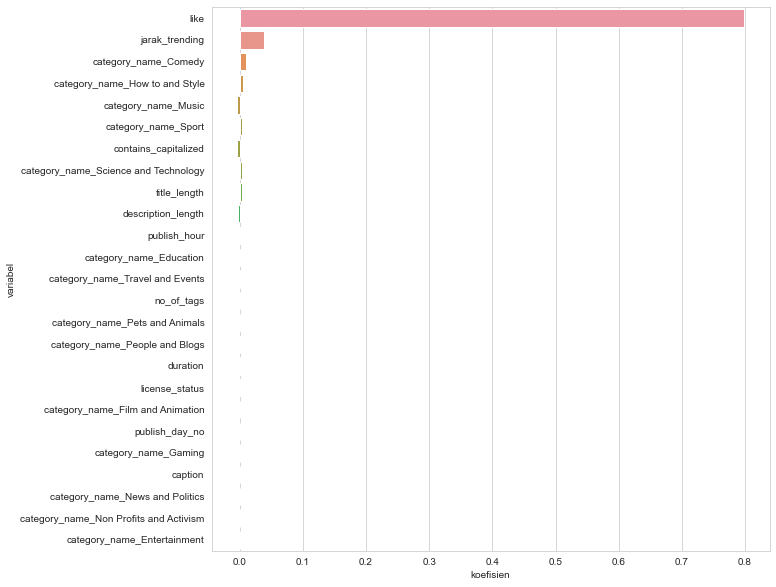

In [39]:
#Linear Regression

from sklearn.linear_model import LinearRegression
model_lr=LinearRegression()
model_lr.fit(X_train,y_train)

koef = pd.DataFrame(model_lr.coef_)
koef_svr = pd.DataFrame(X_train.columns)
koef_svr['koefisien'] = koef
koef_svr.columns = ['variabel','koefisien']
print(koef_svr)
koef_svr = koef_svr.sort_values(by=['koefisien'], ascending=False, key = abs)

plt.figure(figsize = (10,10))
sns.barplot(y=koef_svr['variabel'], x= koef_svr['koefisien'])

SUPPORT VECTOR REGRESSION

                                  variabel  koefisien
0                                 duration  -0.011382
1                                  caption   0.002502
2                           license_status   0.007243
3                                     like   0.801257
4                           publish_day_no  -0.005315
5                             publish_hour  -0.002275
6                           jarak_trending   0.088600
7                       description_length  -0.065335
8                             title_length  -0.037186
9                               no_of_tags  -0.002234
10                    contains_capitalized  -0.012490
11                    category_name_Comedy   0.038756
12                 category_name_Education   0.000000
13             category_name_Entertainment  -0.049053
14        category_name_Film and Animation  -0.011602
15                    category_name_Gaming   0.000000
16          category_name_How to and Style   0.037392
17                     categ

<AxesSubplot:xlabel='koefisien', ylabel='variabel'>

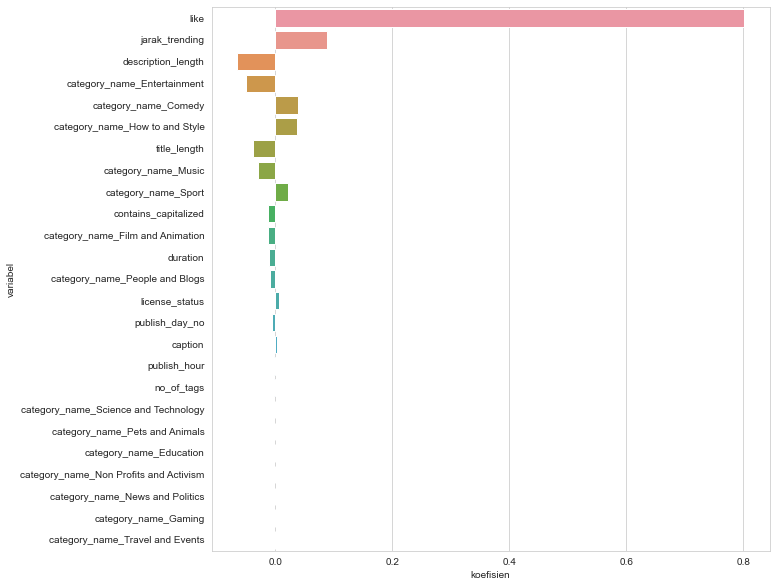

In [40]:
#Support Vector Regression

from sklearn.svm import SVR
model_svr = SVR(kernel = 'linear')
model_svr.fit(X_train, y_train)

koef = pd.DataFrame(model_svr.coef_).transpose()
koef_svr = pd.DataFrame(X_train.columns)
koef_svr['koefisien'] = koef
koef_svr.columns = ['variabel','koefisien']
print(koef_svr)
koef_svr = koef_svr.sort_values(by=['koefisien'], ascending=False, key = abs)

plt.figure(figsize = (10,10))
sns.barplot(y=koef_svr['variabel'], x= koef_svr['koefisien'])

REGRESSION TREE

In [41]:
# regression tree
from sklearn.tree import DecisionTreeRegressor
# memasukan library untuk menggambar decision tree
from sklearn import tree
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

# buat model decision tree
# kriteria boundary yang digunakan mse
dt = DecisionTreeRegressor(criterion='mse', max_features='sqrt', max_depth=3, random_state=5)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, max_features='sqrt', random_state=5)

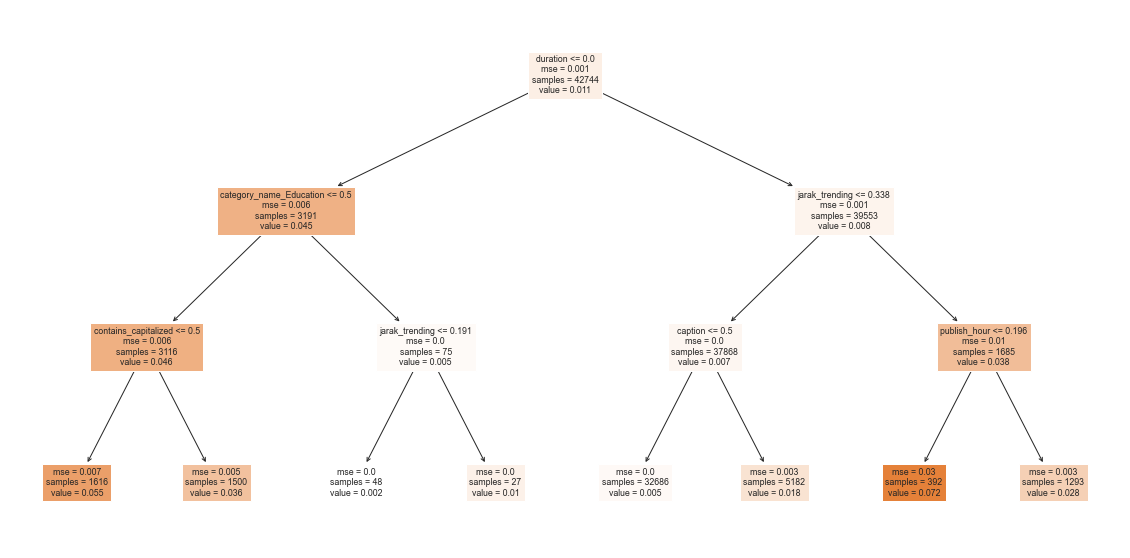

In [42]:
fig = plt.figure(figsize=(20,10))
yiha = tree.plot_tree(dt, 
                   feature_names=X_train.columns,  
                   class_names=True,
                   filled=True)

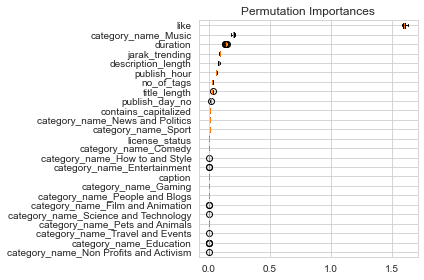

In [43]:
from sklearn.inspection import permutation_importance

dt = DecisionTreeRegressor(criterion='mse', random_state=15)
dt.fit(X_train, y_train)

result = permutation_importance(dt, X_train, y_train, n_repeats=20,
                                random_state=15, n_jobs=-1)

sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_train.columns[sorted_idx])
ax.set_title("Permutation Importances")
fig.tight_layout()
plt.show()

# Evaluation

In [44]:
# mengecek performa model pada data test
from sklearn.metrics import mean_squared_error

print("RMSE Ridge Regression  : ", np.sqrt(mean_squared_error(y_test, model_ridge.predict(X_test))))
print("RMSE Linear Regression : ", np.sqrt(mean_squared_error(y_test, model_lr.predict(X_test))))
print("RMSE SVR               : ", np.sqrt(mean_squared_error(y_test, model_svr.predict(X_test))))
print("RMSE Regression Tree   : ", np.sqrt(mean_squared_error(y_test, dt.predict(X_test))))

RMSE Ridge Regression  :  0.017064802397382724
RMSE Linear Regression :  0.01711073322049233
RMSE SVR               :  0.03400501964835168
RMSE Regression Tree   :  0.006467693061319692


In [45]:
# mengecek akurasi
from sklearn.metrics import accuracy_score
print("R2 Ridge Regression  : ", model_ridge.score(X_test, y_test))
print("R2 Linear Regression : ", model_lr.score(X_test, y_test))
print("R2 SVR               : ", model_svr.score(X_test, y_test))
print("R2 Regression Tree   : ", dt.score(X_test, y_test))

R2 Ridge Regression  :  0.7789607759580892
R2 Linear Regression :  0.7777692969971263
R2 SVR               :  0.1222862940553151
R2 Regression Tree   :  0.9682483994333904


In [47]:
# Adjusted R-Square
import statsmodels.api as sm
from sklearn.metrics import r2_score
print("R2 adj Ridge Regression  : ", 1-((1-(r2_score(y_test, model_ridge.predict(X_test))))*53429/(53428-25-1)))
print("R2 adj Linear Regression : ", 1-(((1-(r2_score(y_test, model_lr.predict(X_test))))*53429/(53428-25-1))))
print("R2 adj SVR               : ", 1-(((1-(r2_score(y_test, model_svr.predict(X_test))))*53429/(53428-25-1))))
print("R2 adj Regression Tree   : ", 1-(((1-(r2_score(y_test, dt.predict(X_test))))*53429/(53428-25-1))))

#1 – [(1-R2)*(n-1)/(n-k-1)]

R2 adj Ridge Regression  :  0.7788490187383384
R2 adj Linear Regression :  0.7776569373667551
R2 adj SVR               :  0.12184252284711117
R2 adj Regression Tree   :  0.9682323458545862
